In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.data.wages_dfs import WagesData

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(
    bucket_name="fbref_db", blob_name="Premier-League-wages.csv"
)

[03/04/24 21:09:56] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=999900;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=176277;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=930015;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=359945;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

rk              player nation    pos    squad  age  weekly_wages_euros  \
0   1      Alexis Sánchez    CHI  MF,FW  Arsenal   28              402897   
1   2          Mesut Özil    GER  MF,FW  Arsenal   28              402897   
2   3         Eden Hazard    BEL  FW,MF  Chelsea   26              256548   
3   4       Cesc Fàbregas    ESP     MF  Chelsea   30              236735   
4   5  Henrikh Mkhitaryan    ARM  FW,MF  Arsenal   28              230227   

   annual_wages_euros                  notes     season  
0            20950637  Unverified estimation  2017-2018  
1            20950637  Unverified estimation  2017-2018  
2            13340491  Unverified estimation  2017-2018  
3            12310226  Unverified estimation  2017-2018  
4            11971793  Unverified estimation  2017-2018

In [4]:
df.shape

(4048, 10)

In [5]:
describe_data(df)

Data Types  Null Counts  Null %  Unique Values   Min  \
rk                      int64            0     0.0            638     1   
age                     int64            0     0.0             26    16   
weekly_wages_euros      int64            0     0.0            642   112   
annual_wages_euros      int64            0     0.0            644  5821   

                         Max     Median        Mean     Std Dev  Outliers  \
rk                       638      290.0      290.33      168.18         0   
age                       42       26.0       25.71        4.44         2   
weekly_wages_euros    715539    46568.0    65510.60    66331.90       219   
annual_wages_euros  37208019  2421538.0  3406551.73  3449258.51       219   

                    Outliers %  
rk                        0.00  
age                       0.05  
weekly_wages_euros        5.41  
annual_wages_euros        5.41

Clean data


In [6]:
df = Cleaning(df).pipeline()

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', 

In [7]:
df.head()

rk              player nation    pos    squad  age  weekly_wages_euros  \
0   1      Alexis Sánchez    CHI  MF,FW  Arsenal   28              402897   
1   2          Mesut Özil    GER  MF,FW  Arsenal   28              402897   
2   3         Eden Hazard    BEL  FW,MF  Chelsea   26              256548   
3   4       Cesc Fàbregas    ESP     MF  Chelsea   30              236735   
4   5  Henrikh Mkhitaryan    ARM  FW,MF  Arsenal   28              230227   

   annual_wages_euros                  notes     season general_pos age_range  \
0            20950637  Unverified estimation  2017-2018  Midfielder     25-29   
1            20950637  Unverified estimation  2017-2018  Midfielder     25-29   
2            13340491  Unverified estimation  2017-2018     Forward     25-29   
3            12310226  Unverified estimation  2017-2018  Midfielder     30-34   
4            11971793  Unverified estimation  2017-2018     Forward     25-29   

   country      continent  
0    Chile  South America  
1  Germany         Europe  
2  Belgium         Europe  
3    Spain         Europe  
4  Armenia           Asia

Statistical plots


In [8]:
stat_plots = StatisticPlots(df)

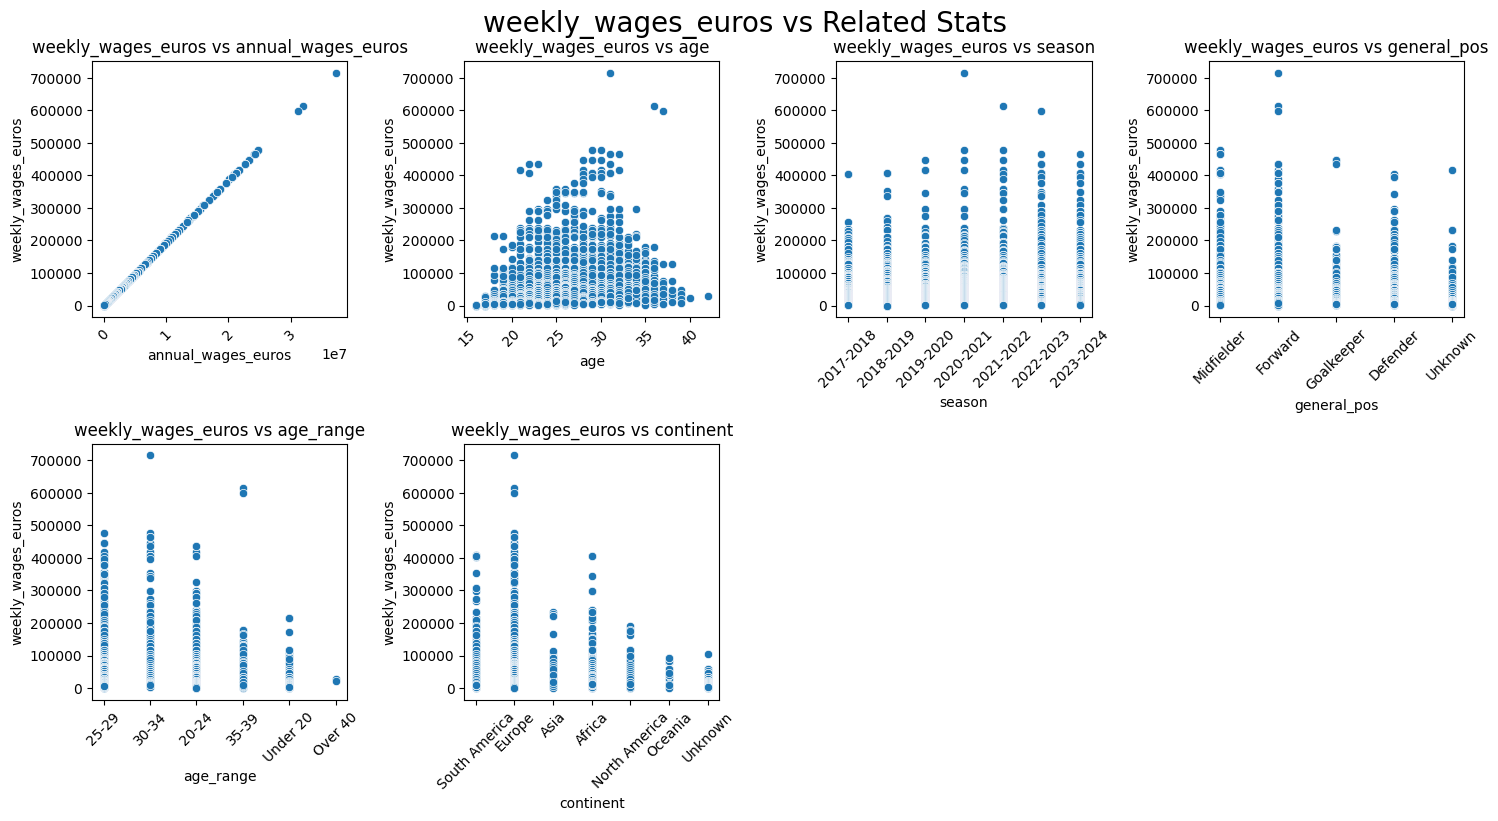

In [9]:
stat_plots.relationships(
    y="weekly_wages_euros",
    X=["annual_wages_euros", "age", "season", "general_pos", "age_range", "continent"],
)

Investigate data

Average Weekly Wages

In [10]:
def analyse_wages(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    # Calculate mean and count together
    grouped = df.groupby(groupby)
    mean_df = grouped[["weekly_wages_euros", "annual_wages_euros"]].mean()
    count_df = grouped.size().to_frame(name='count')
    
    # Merge the mean and count DataFrames
    result_df = pd.merge(mean_df, count_df, left_index=True, right_index=True)
    
    # Sort the values
    result_df = result_df.sort_values(by=['weekly_wages_euros', 'annual_wages_euros'], ascending=False).reset_index()
    
    # Round the wage columns
    result_df["weekly_wages_euros"] = result_df["weekly_wages_euros"].apply(lambda x: round(x, 2))
    result_df["annual_wages_euros"] = result_df["annual_wages_euros"].apply(lambda x: round(x, 2))
    
    return result_df

In [11]:
squads = analyse_wages(df=df, groupby='squad')
squads

squad  weekly_wages_euros  annual_wages_euros  count
0   Manchester City           138079.54          7180136.68    183
1    Manchester Utd           137213.51          7135102.63    218
2           Chelsea           115558.48          6009040.29    212
3         Liverpool           104232.27          5420077.61    192
4           Arsenal           101302.20          5267716.78    213
5         Tottenham            85076.72          4423991.93    199
6          West Ham            65952.78          3429543.01    190
7       Aston Villa            64812.21          3370233.92    140
8           Everton            64533.93          3355766.39    197
9    Leicester City            59790.13          3109088.40    174
10   Crystal Palace            57692.86          3000029.90    199
11      Southampton            49038.60          2550008.95    166
12    Newcastle Utd            47778.89          2484500.49    208
13  Nott'ham Forest            44215.80          2299221.91     70
14           Fulham            43154.75          2244046.55    114
15       Stoke City            43106.08          2241514.54     26
16           Wolves            42534.18          2211777.56    170
17        West Brom            36573.43          1901818.70     61
18         Brighton            36243.22          1884647.89    205
19          Watford            35497.70          1845881.16    129
20      Bournemouth            34135.45          1775044.02    158
21     Swansea City            33334.48          1733389.70     27
22          Burnley            32937.50          1712750.68    161
23     Leeds United            30622.52          1592370.09     82
24        Brentford            24990.55          1299514.48     88
25     Norwich City            24727.71          1285840.34     56
26     Huddersfield            23431.18          1218419.86     57
27     Cardiff City            21626.71          1124585.11     35
28       Luton Town            21142.69          1099424.00     26
29    Sheffield Utd            19201.73           998493.47     92

In [12]:
def visualise_wages(df: pd.DataFrame, column: str, figsize: tuple[int, int] = (20, 12)) -> plt.Axes:

    data = analyse_wages(df=df, groupby=column)

    fig, axes = plt.subplots(figsize=figsize)

    fig = sns.barplot(data=data, y=column, x='weekly_wages_euros', color='royalblue', ax=axes, palette='Blues_r')
    for i, v in enumerate(data['weekly_wages_euros']):
        axes.text(v + 0.5, i + .10, f'€{v:,.0f}', ha='left', va='center', color='black', fontsize=12)
    plt.xlabel('Weekly Wages (Euros)')
    plt.ylabel(column)
    plt.title(f'Weekly Wages (Euros) by {column}')
    
    return fig

In [13]:
visualise_wages(df, 'squad')
plt.show()

Create timeseries graph of average wages by season

In [14]:
data = df.groupby(['season', 'squad'])['weekly_wages_euros'].mean().reset_index()

fig, axes = plt.subplots(figsize=(17, 9))
sns.lineplot(data=data, x='season', y='weekly_wages_euros', hue='squad', style='squad', markers=True, ax=axes)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

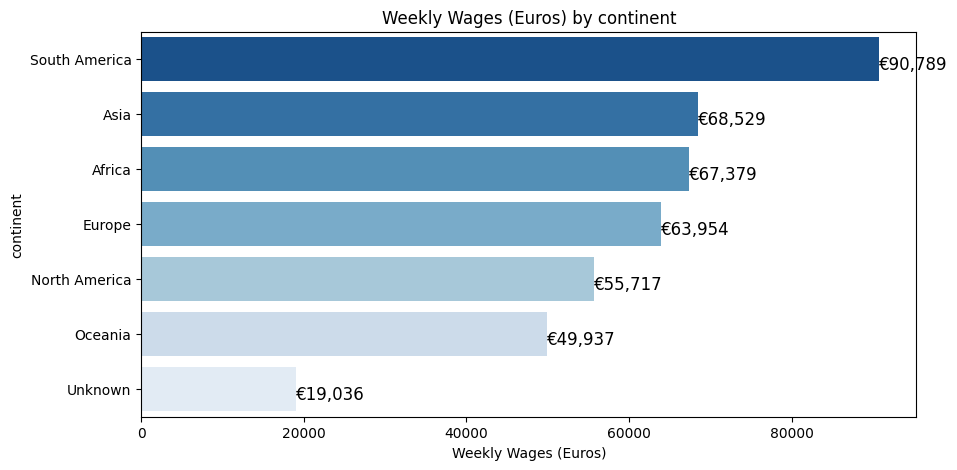

In [15]:
visualise_wages(df, 'continent', figsize=(10, 5))
plt.show()

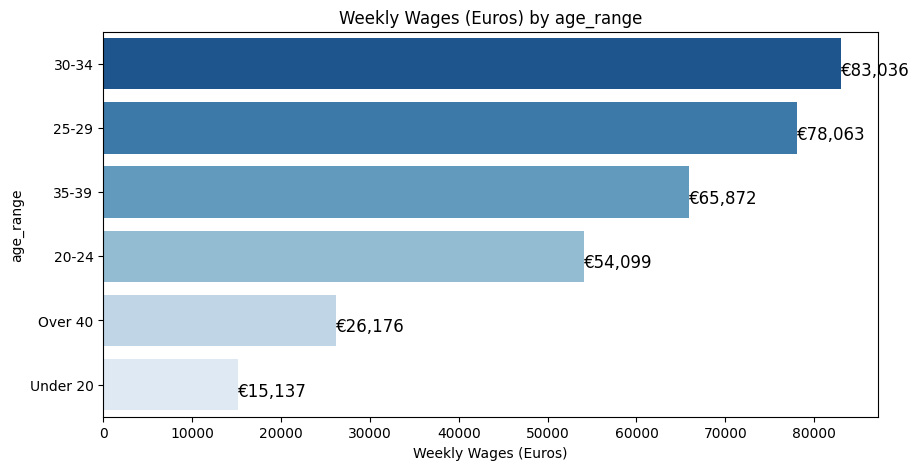

In [16]:
visualise_wages(df, 'age_range', figsize=(10, 5))
plt.show()

In [17]:
visualise_wages(df, 'general_pos', figsize=(10, 5))
plt.show()

In [18]:
countries = df['country'].value_counts().index[:10]
dff = df[df['country'].isin(countries)]

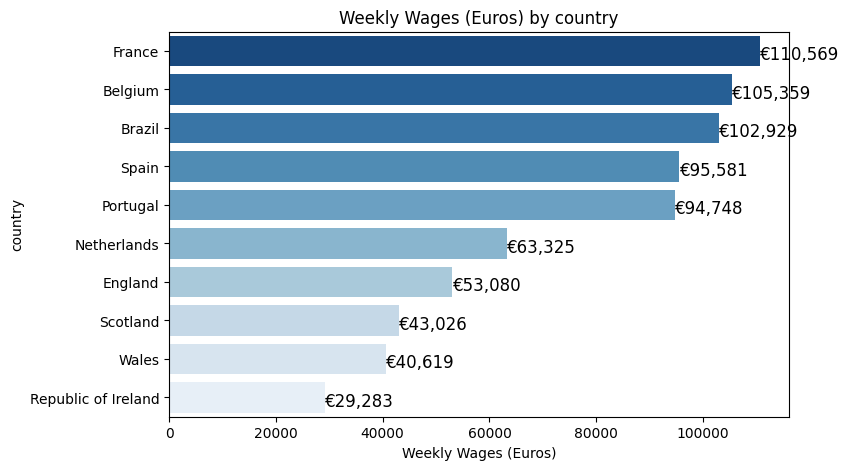

In [19]:
visualise_wages(dff, 'country', figsize=(8, 5))
plt.show()

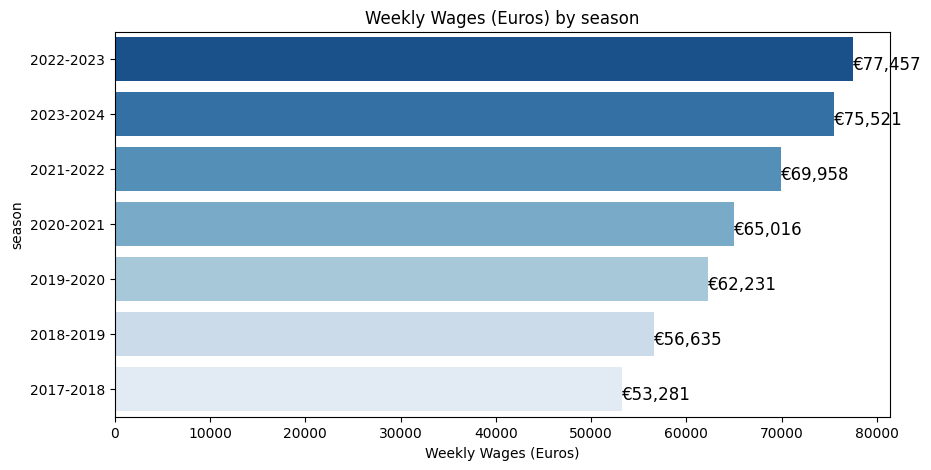

In [20]:
visualise_wages(df, 'season', figsize=(10, 5))
plt.show()

Percentage increase year on year

In [21]:
data = analyse_wages(df, 'season').sort_values('season')
data.loc[:, 'weekly_wage_pct_change'] = data['weekly_wages_euros'].pct_change() * 100

In [22]:
# season to season change average
data['weekly_wage_pct_change'].mean()

6.07857962984282

- Weekly wage has increased by 6.1% on average over the last 7 seasons

How does this line up for the top teams?

In [23]:
def season_wages_df(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    data = (
        df.groupby(["season", groupby])
        .agg(
            avg_weekly_wages=("weekly_wages_euros", "mean"),
            total_weekly_wages=("weekly_wages_euros", "sum"),
            avg_annual_wages=("annual_wages_euros", "mean"),
            total_annual_wages=("annual_wages_euros", "sum"),
            total_players=("player", "size"),
            avg_age=("age", "mean"),
        )
        .round(2)
        .reset_index()
    )
    data.loc[:, "avg_wage_pct_change"] = (
        data.groupby(groupby)["avg_weekly_wages"]
        .pct_change()
        .mul(100)
        .fillna(0)
        .round(2)
    )
    data.loc[:, "total_wage_pct_change"] = (
        data.groupby(groupby)["total_annual_wages"]
        .pct_change()
        .mul(100)
        .fillna(0)
        .round(2)
    )

    # squad size pct change
    data.loc[:, "squad_size_pct_change"] = (
        data.groupby(groupby)["total_players"].pct_change().mul(100).fillna(0).round(2)
    )

    # avg age pct change
    data.loc[:, "avg_age_pct_change"] = (
        data.groupby(groupby)["avg_age"].pct_change().mul(100).fillna(0).round(2)
    )

    return data

In [24]:
data = season_wages_df(df, "country")
data[data['total_players'] > 30].sort_values('avg_weekly_wages', ascending=False)

season  country  avg_weekly_wages  total_weekly_wages  \
342  2022-2023   Brazil         109860.28             3954970   
354  2022-2023   France         108664.06             3585914   
323  2021-2022    Spain          98413.97             3050833   
197  2019-2020    Spain          95491.85             3151231   
59   2017-2018    Spain          86437.84             2679573   
131  2018-2019    Spain          86328.33             3366805   
415  2023-2024  England          75875.66            12140105   
353  2022-2023  England          69615.88            12182779   
289  2021-2022  England          58840.59            11062030   
162  2019-2020  England          50369.01             9167160   
227  2020-2021  England          48744.90            10382663   
23   2017-2018  England          39218.26             8314272   
90   2018-2019  England          38678.62             8780047   

     avg_annual_wages  total_annual_wages  total_players  avg_age  \
342        5712731.44           205658332             36    26.50   
354        5650532.94           186467587             33    24.64   
323        5117525.94           158643304             31    26.90   
197        4965580.55           163864158             33    26.73   
59         4494769.45           139337853             31    26.87   
131        4489072.72           175073836             39    26.59   
415        3945536.20           631285792            160    26.48   
353        3620023.09           633504041            175    25.91   
289        3059712.52           575225954            188    25.62   
162        2619188.23           476692258            182    25.73   
227        2534735.78           539898721            213    25.02   
23         2039351.22           432342458            212    23.84   
90         2011289.89           456562804            227    24.16   

     avg_wage_pct_change  total_wage_pct_change  squad_size_pct_change  \
342                 8.88                  56.78                  44.00   
354               -19.02                  -1.03                  22.22   
323                -3.70                   6.61                  10.71   
197                10.61                  -6.40                 -15.38   
59                  0.00                   0.00                   0.00   
131                -0.13                  25.65                  25.81   
415                 8.99                  -0.35                  -8.57   
353                18.31                  10.13                  -6.91   
289                20.71                   6.54                 -11.74   
162                30.22                   4.41                 -19.82   
227                -3.22                  13.26                  17.03   
23                  0.00                   0.00                   0.00   
90                 -1.38                   5.60                   7.08   

     avg_age_pct_change  
342                0.53  
354               -2.61  
323               -0.63  
197                0.53  
59                 0.00  
131               -1.04  
415                2.20  
353                1.13  
289                2.40  
162                6.50  
227               -2.76  
23                 0.00  
90                 1.34

In [25]:
# should get end of season table and look for correlations with wages

In [26]:
# total wage pct change
data['total_wage_pct_change'].mean()

45.94670281995662

In [27]:
# average wage pct change
data['avg_wage_pct_change'].mean()

28.32184381778742

Highest paid players for each season

In [28]:
df.loc[df['season'] == '2019-2020'].sort_values('weekly_wages_euros', ascending=False).head(10)

rk           player nation    pos            squad  age  \
1218   1     David de Gea    ESP     GK   Manchester Utd   28   
1220   3  Kevin De Bruyne    BEL     MF  Manchester City   28   
1219   2       Mesut Özil    GER     MF          Arsenal   30   
1221   4       Paul Pogba    FRA     MF   Manchester Utd   26   
1222   5  Anthony Martial    FRA     FW   Manchester Utd   23   
1223   6    Sergio Agüero    ARG     FW  Manchester City   31   
1224   7  Marcus Rashford    ENG     FW   Manchester Utd   21   
1225   8       Harry Kane    ENG     FW        Tottenham   26   
1226   9  Tanguy Ndombele    FRA     MF        Tottenham   22   
1227  10     Riyad Mahrez    ALG  FW,MF  Manchester City   28   

      weekly_wages_euros  annual_wages_euros                  notes  \
1218              447212            23255012  Unverified estimation   
1220              417398            21704678                    NaN   
1219              417398            21704678  Unverified estimation   
1221              345844            17983876  Unverified estimation   
1222              298141            15503341  Unverified estimation   
1223              274519            14274999  Unverified estimation   
1224              238513            12402673  Unverified estimation   
1225              238513            12402673  Unverified estimation   
1226              238513            12402673  Unverified estimation   
1227              238513            12402673  Unverified estimation   

         season general_pos age_range    country      continent  
1218  2019-2020  Goalkeeper     25-29      Spain         Europe  
1220  2019-2020  Midfielder     25-29    Belgium         Europe  
1219  2019-2020  Midfielder     30-34    Germany         Europe  
1221  2019-2020  Midfielder     25-29     France         Europe  
1222  2019-2020     Forward     20-24     France         Europe  
1223  2019-2020     Forward     30-34  Argentina  South America  
1224  2019-2020     Forward     20-24    England         Europe  
1225  2019-2020     Forward     25-29    England         Europe  
1226  2019-2020  Midfielder     20-24     France         Europe  
1227  2019-2020     Forward     25-29    Algeria         Africa

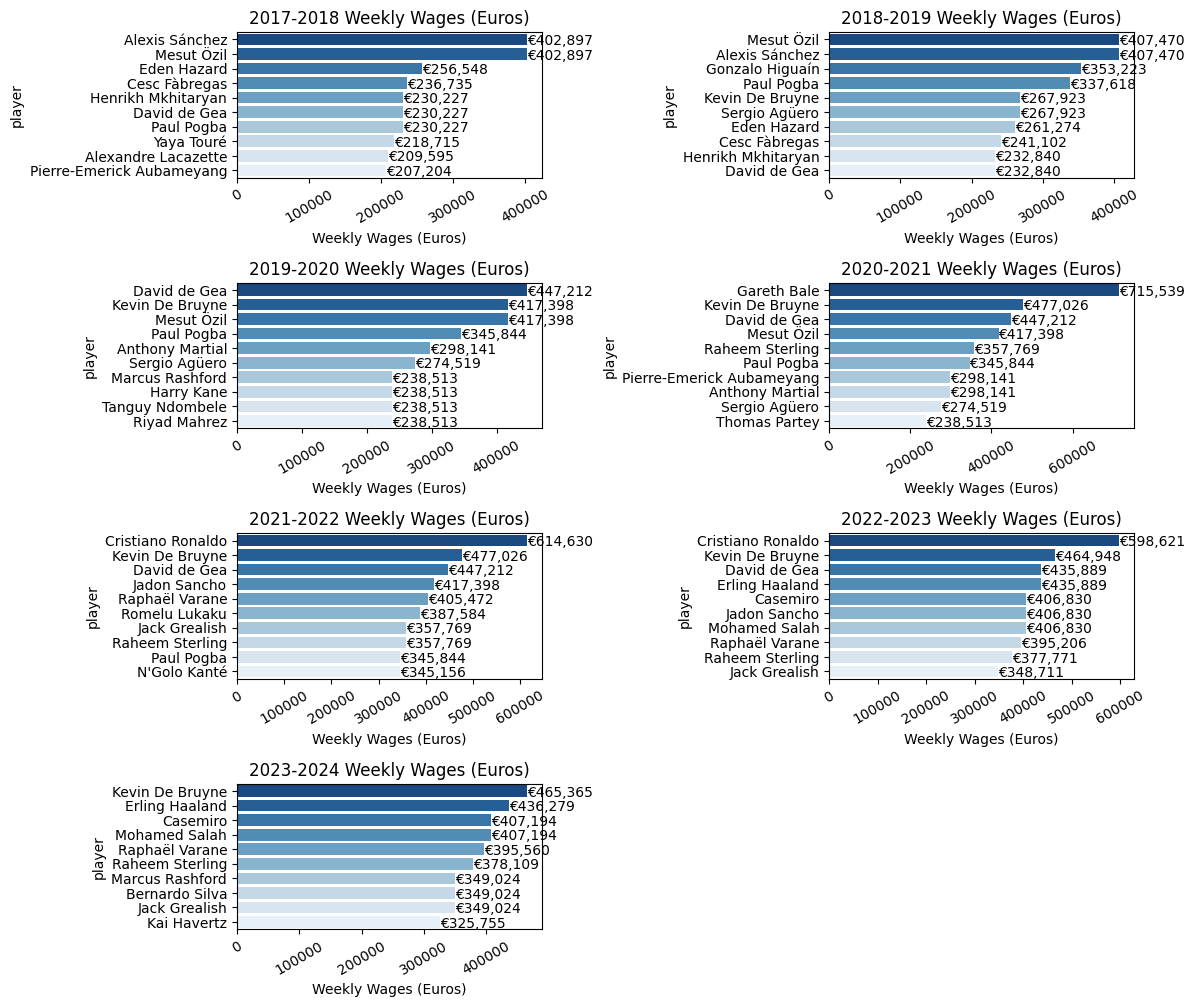

In [29]:
# get seasons
seasons = df['season'].unique().tolist()

fig, axes = plt.subplots(5, 2, figsize=(12, 12))

for i in range(len(seasons), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])
    
for stat, ax in zip(seasons, axes.flatten()):
    data = df.loc[df['season'] == stat].sort_values('weekly_wages_euros', ascending=False).head(10)
    sns.barplot(data=data, y='player', x='weekly_wages_euros', ax=ax, palette='Blues_r')
    ax.set_title(f'{stat} Weekly Wages (Euros)')
    ax.set_xlabel('Weekly Wages (Euros)')
    # change x axis spacing
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        
    for i, v in enumerate(data['weekly_wages_euros']):
        ax.text(v + 0.5, i + .10, f'€{v:,.0f}', ha='left', va='center', color='black', fontsize=10)
    
plt.tight_layout()

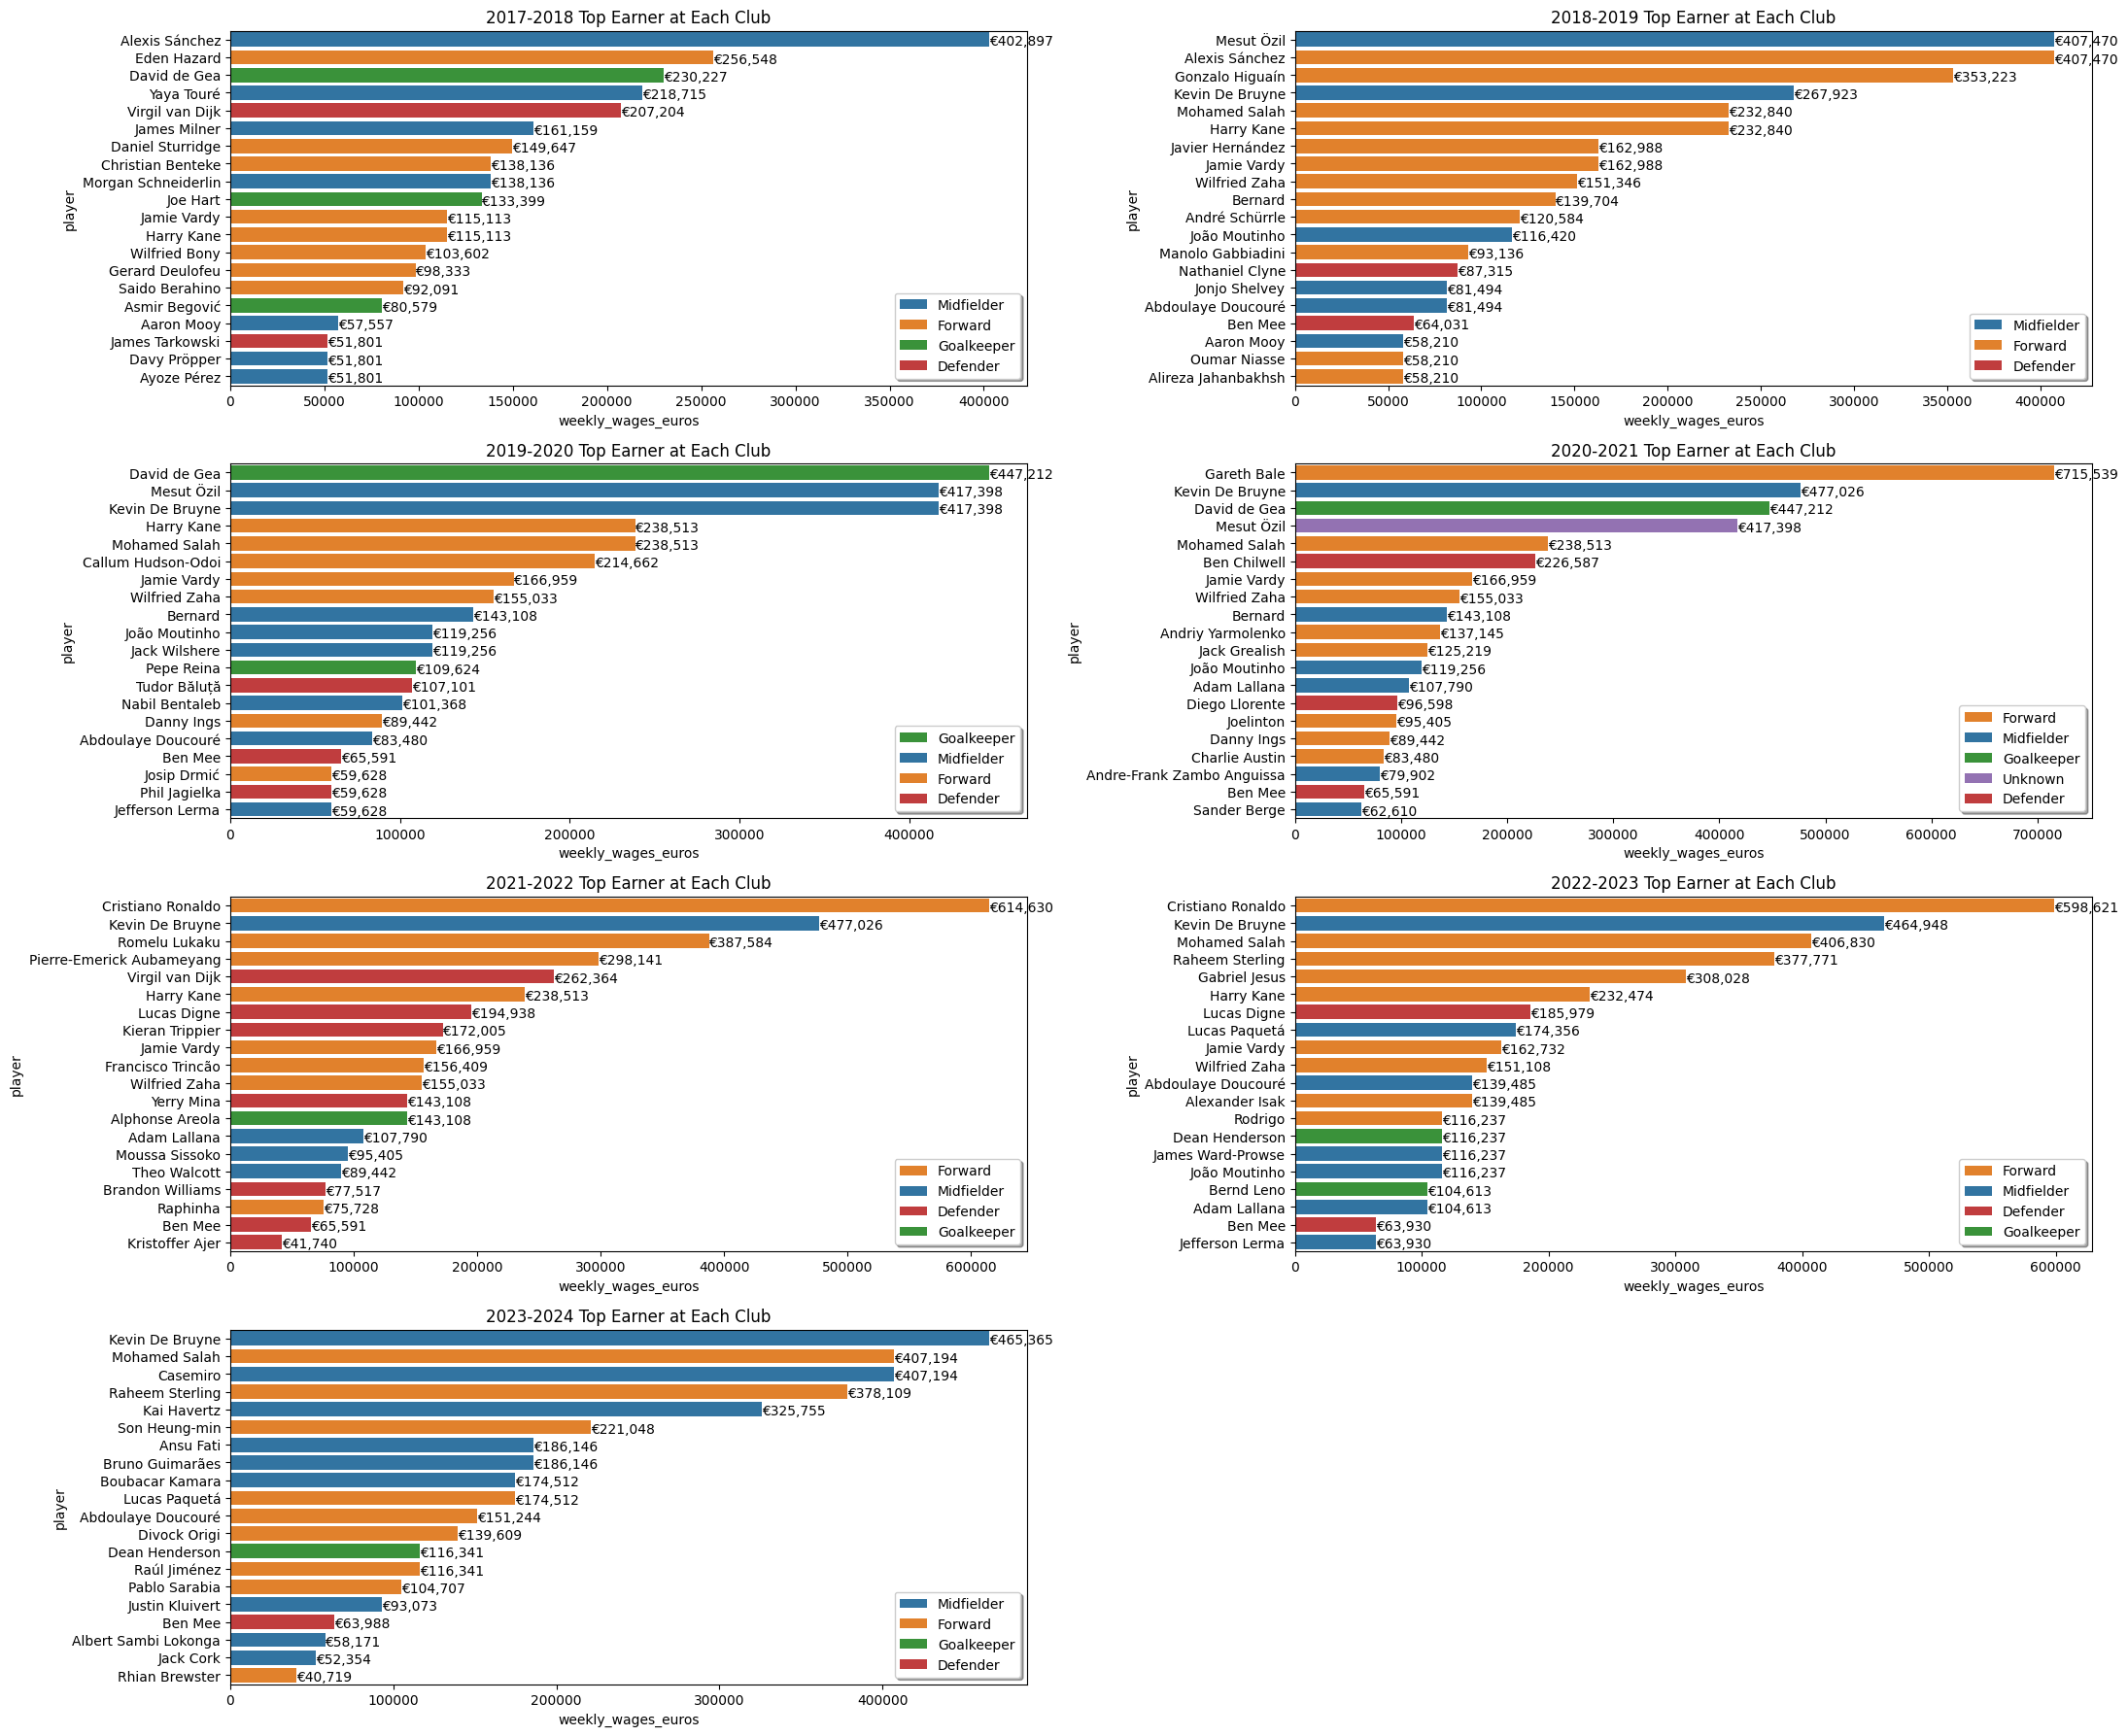

In [30]:
# top earner at each club
seasons = df["season"].unique().tolist()

# palette
colors = sns.color_palette('tab10')
palette = dict(zip(df['general_pos'].unique(), colors))

fig, axes = plt.subplots(5, 2, figsize=(22, 22))

for i in range(len(seasons), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for season, ax in zip(seasons, axes.flatten()):
    data = df.loc[(df["season"] == season)]

    data_2 = data.loc[data.groupby("squad")["weekly_wages_euros"].idxmax()].sort_values(
        "weekly_wages_euros", ascending=False
    )
    
    

    sns.barplot(
        data=data_2,
        y="player",
        x="weekly_wages_euros",
        hue="general_pos",
        ax=ax,
        palette=palette,
    )
    ax.legend(
        loc="lower right",
        # bbox_to_anchor=(0.5, 1.05),
        # ncol=5,
        fancybox=True,
        shadow=True,
    )
    
    ax.set_title(f"{season} Top Earner at Each Club")

    for i, v in enumerate(data_2["weekly_wages_euros"]):
        ax.text(
            v + 0.5,
            i + 0.10,
            f"€{v:,.0f}",
            ha="left",
            va="center",
            color="black",
            fontsize=10,
        )

    # plt.title("Top Earner at Each Club (2023-2024)")
    # plt.xlabel("Weekly Wages (Euros)")
    # plt.ylabel("Player")
    # plt.legend(loc='lower right')
    # plt.show()
    plt.tight_layout()

In [31]:
data_2

rk                player nation    pos            squad  age  \
3497    1       Kevin De Bruyne    BEL     MF  Manchester City   32   
3500    4         Mohamed Salah    EGY     FW        Liverpool   31   
3499    3              Casemiro    BRA     MF   Manchester Utd   31   
3502    6       Raheem Sterling    ENG  FW,MF          Chelsea   28   
3506   10           Kai Havertz    GER     MF          Arsenal   24   
3529   33         Son Heung-min    KOR     FW        Tottenham   31   
3542   46             Ansu Fati    ESP  MF,FW         Brighton   20   
3540   44       Bruno Guimarães    BRA     MF    Newcastle Utd   25   
3550   54       Boubacar Kamara    FRA     MF      Aston Villa   23   
3546   50         Lucas Paquetá    BRA  FW,MF         West Ham   25   
3561   65    Abdoulaye Doucouré    MLI  FW,MF          Everton   30   
3581   85          Divock Origi    BEL  FW,MF  Nott'ham Forest   28   
3592   96        Dean Henderson    ENG     GK   Crystal Palace   26   
3612  116          Raúl Jiménez    MEX     FW           Fulham   32   
3621  125         Pablo Sarabia    ESP  FW,MF           Wolves   31   
3639  143       Justin Kluivert    NED  MF,FW      Bournemouth   24   
3718  222               Ben Mee    ENG     DF        Brentford   33   
3760  264  Albert Sambi Lokonga    BEL     MF       Luton Town   23   
3778  282             Jack Cork    ENG     MF          Burnley   34   
3818  322        Rhian Brewster    ENG  FW,MF    Sheffield Utd   23   

      weekly_wages_euros  annual_wages_euros                  notes  \
3497              465365            24198963                    NaN   
3500              407194            21174093                    NaN   
3499              407194            21174093                    NaN   
3502              378109            19661658                    NaN   
3506              325755            16939274                    NaN   
3529              221048            11494508                    NaN   
3542              186146             9679585  Unverified estimation   
3540              186146             9679585                    NaN   
3550              174512             9074611                    NaN   
3546              174512             9074611                    NaN   
3561              151244             7864663                    NaN   
3581              139609             7259689                    NaN   
3592              116341             6049741  Unverified estimation   
3612              116341             6049741  Unverified estimation   
3621              104707             5444767                    NaN   
3639               93073             4839793  Unverified estimation   
3718               63988             3327357  Unverified estimation   
3760               58171             3024870  Unverified estimation   
3778               52354             2722383                    NaN   
3818               40719             2117409                    NaN   

         season general_pos age_range      country      continent  
3497  2023-2024  Midfielder     30-34      Belgium         Europe  
3500  2023-2024     Forward     30-34        Egypt         Africa  
3499  2023-2024  Midfielder     30-34       Brazil  South America  
3502  2023-2024     Forward     25-29      England         Europe  
3506  2023-2024  Midfielder     20-24      Germany         Europe  
3529  2023-2024     Forward     30-34  South Korea           Asia  
3542  2023-2024  Midfielder     20-24        Spain         Europe  
3540  2023-2024  Midfielder     25-29       Brazil  South America  
3550  2023-2024  Midfielder     20-24       France         Europe  
3546  2023-2024     Forward     25-29       Brazil  South America  
3561  2023-2024     Forward     30-34         Mali         Africa  
3581  2023-2024     Forward     25-29      Belgium         Europe  
3592  2023-2024  Goalkeeper     25-29      England         Europe  
3612  2023-2024     Forward     30-34       Mexico  North America  
362

## wages dataclass

In [32]:
data = WagesData(df, 'squad').run_seasonal_data()

In [33]:
data.head()

season        squad  avg_weekly_wages  total_weekly_wages  \
0  2017-2018      Arsenal         101740.06             3560902   
1  2017-2018  Bournemouth          30625.48              949390   
2  2017-2018     Brighton          27381.09              903576   
3  2017-2018      Burnley          28271.92              706798   
4  2017-2018      Chelsea          85554.62             2481084   

   avg_annual_wages  total_annual_wages  total_players  avg_age  \
0        5290479.91           185166797             35    24.60   
1        1592526.45            49368320             31    25.06   
2        1423816.48            46985944             33    26.27   
3        1470136.12            36753403             25    27.28   
4        4448844.55           129016492             29    25.03   

   avg_wage_pct_change  total_wage_pct_change  total_players_pct_change  \
0                  0.0                    0.0                       0.0   
1                  0.0                    0.0                       0.0   
2                  0.0                    0.0                       0.0   
3                  0.0                    0.0                       0.0   
4                  0.0                    0.0                       0.0   

   avg_age_pct_change  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [34]:
def pct_change_plots(df: pd.DataFrame, pct_change_col: str) -> None:

    teams = df['squad'].unique().tolist()

    fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))

    for i in range(len(teams), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    for team, ax in zip(teams, axes.flatten()):
        data_2 = df.loc[df['squad'] == team]
        colors = ['royalblue' if x > 0 else 'red' for x in data_2[pct_change_col]]
        
        sns.barplot(data=data_2, x='season', y=pct_change_col, ax=ax, palette=colors)
        
        ax.set_title(f'{team} {pct_change_col} % Change')
        ax.set_xlabel('Season')
        ax.set_ylabel(f' {pct_change_col} % Change')
        ax.set_xticklabels(data_2['season'], rotation=45)
        
    plt.tight_layout()

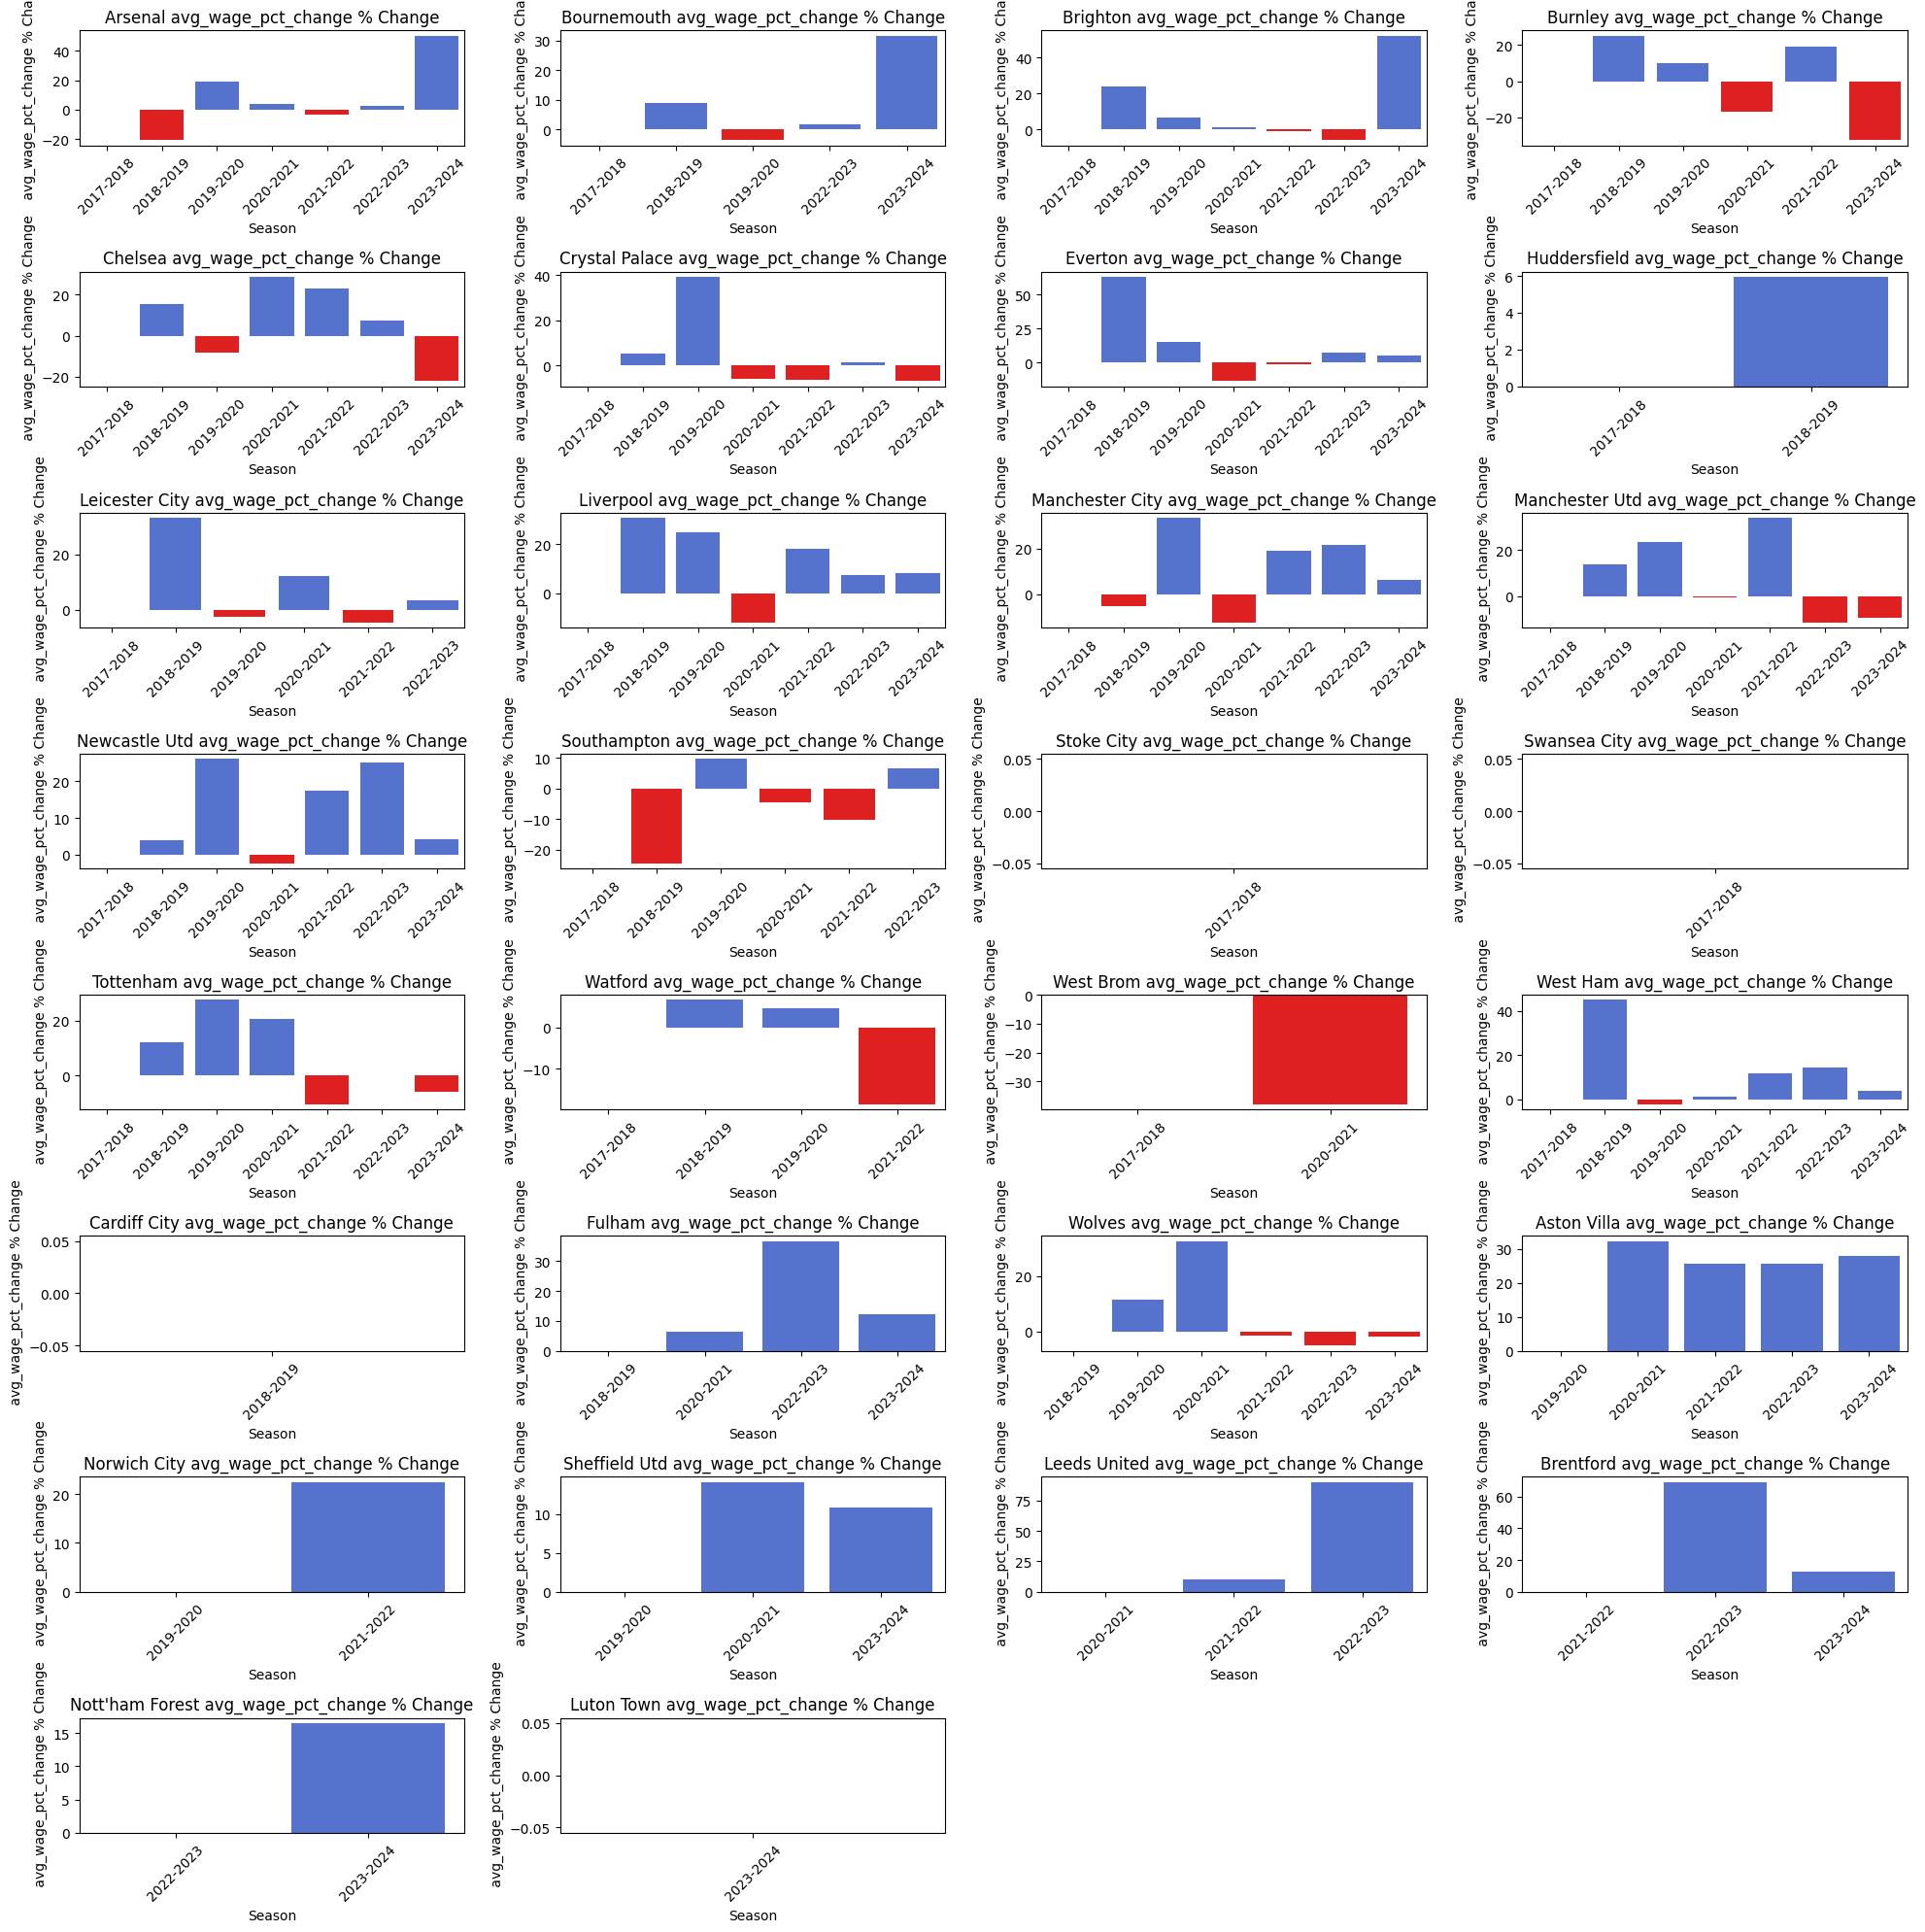

In [35]:
pct_change_plots(data, 'avg_wage_pct_change')

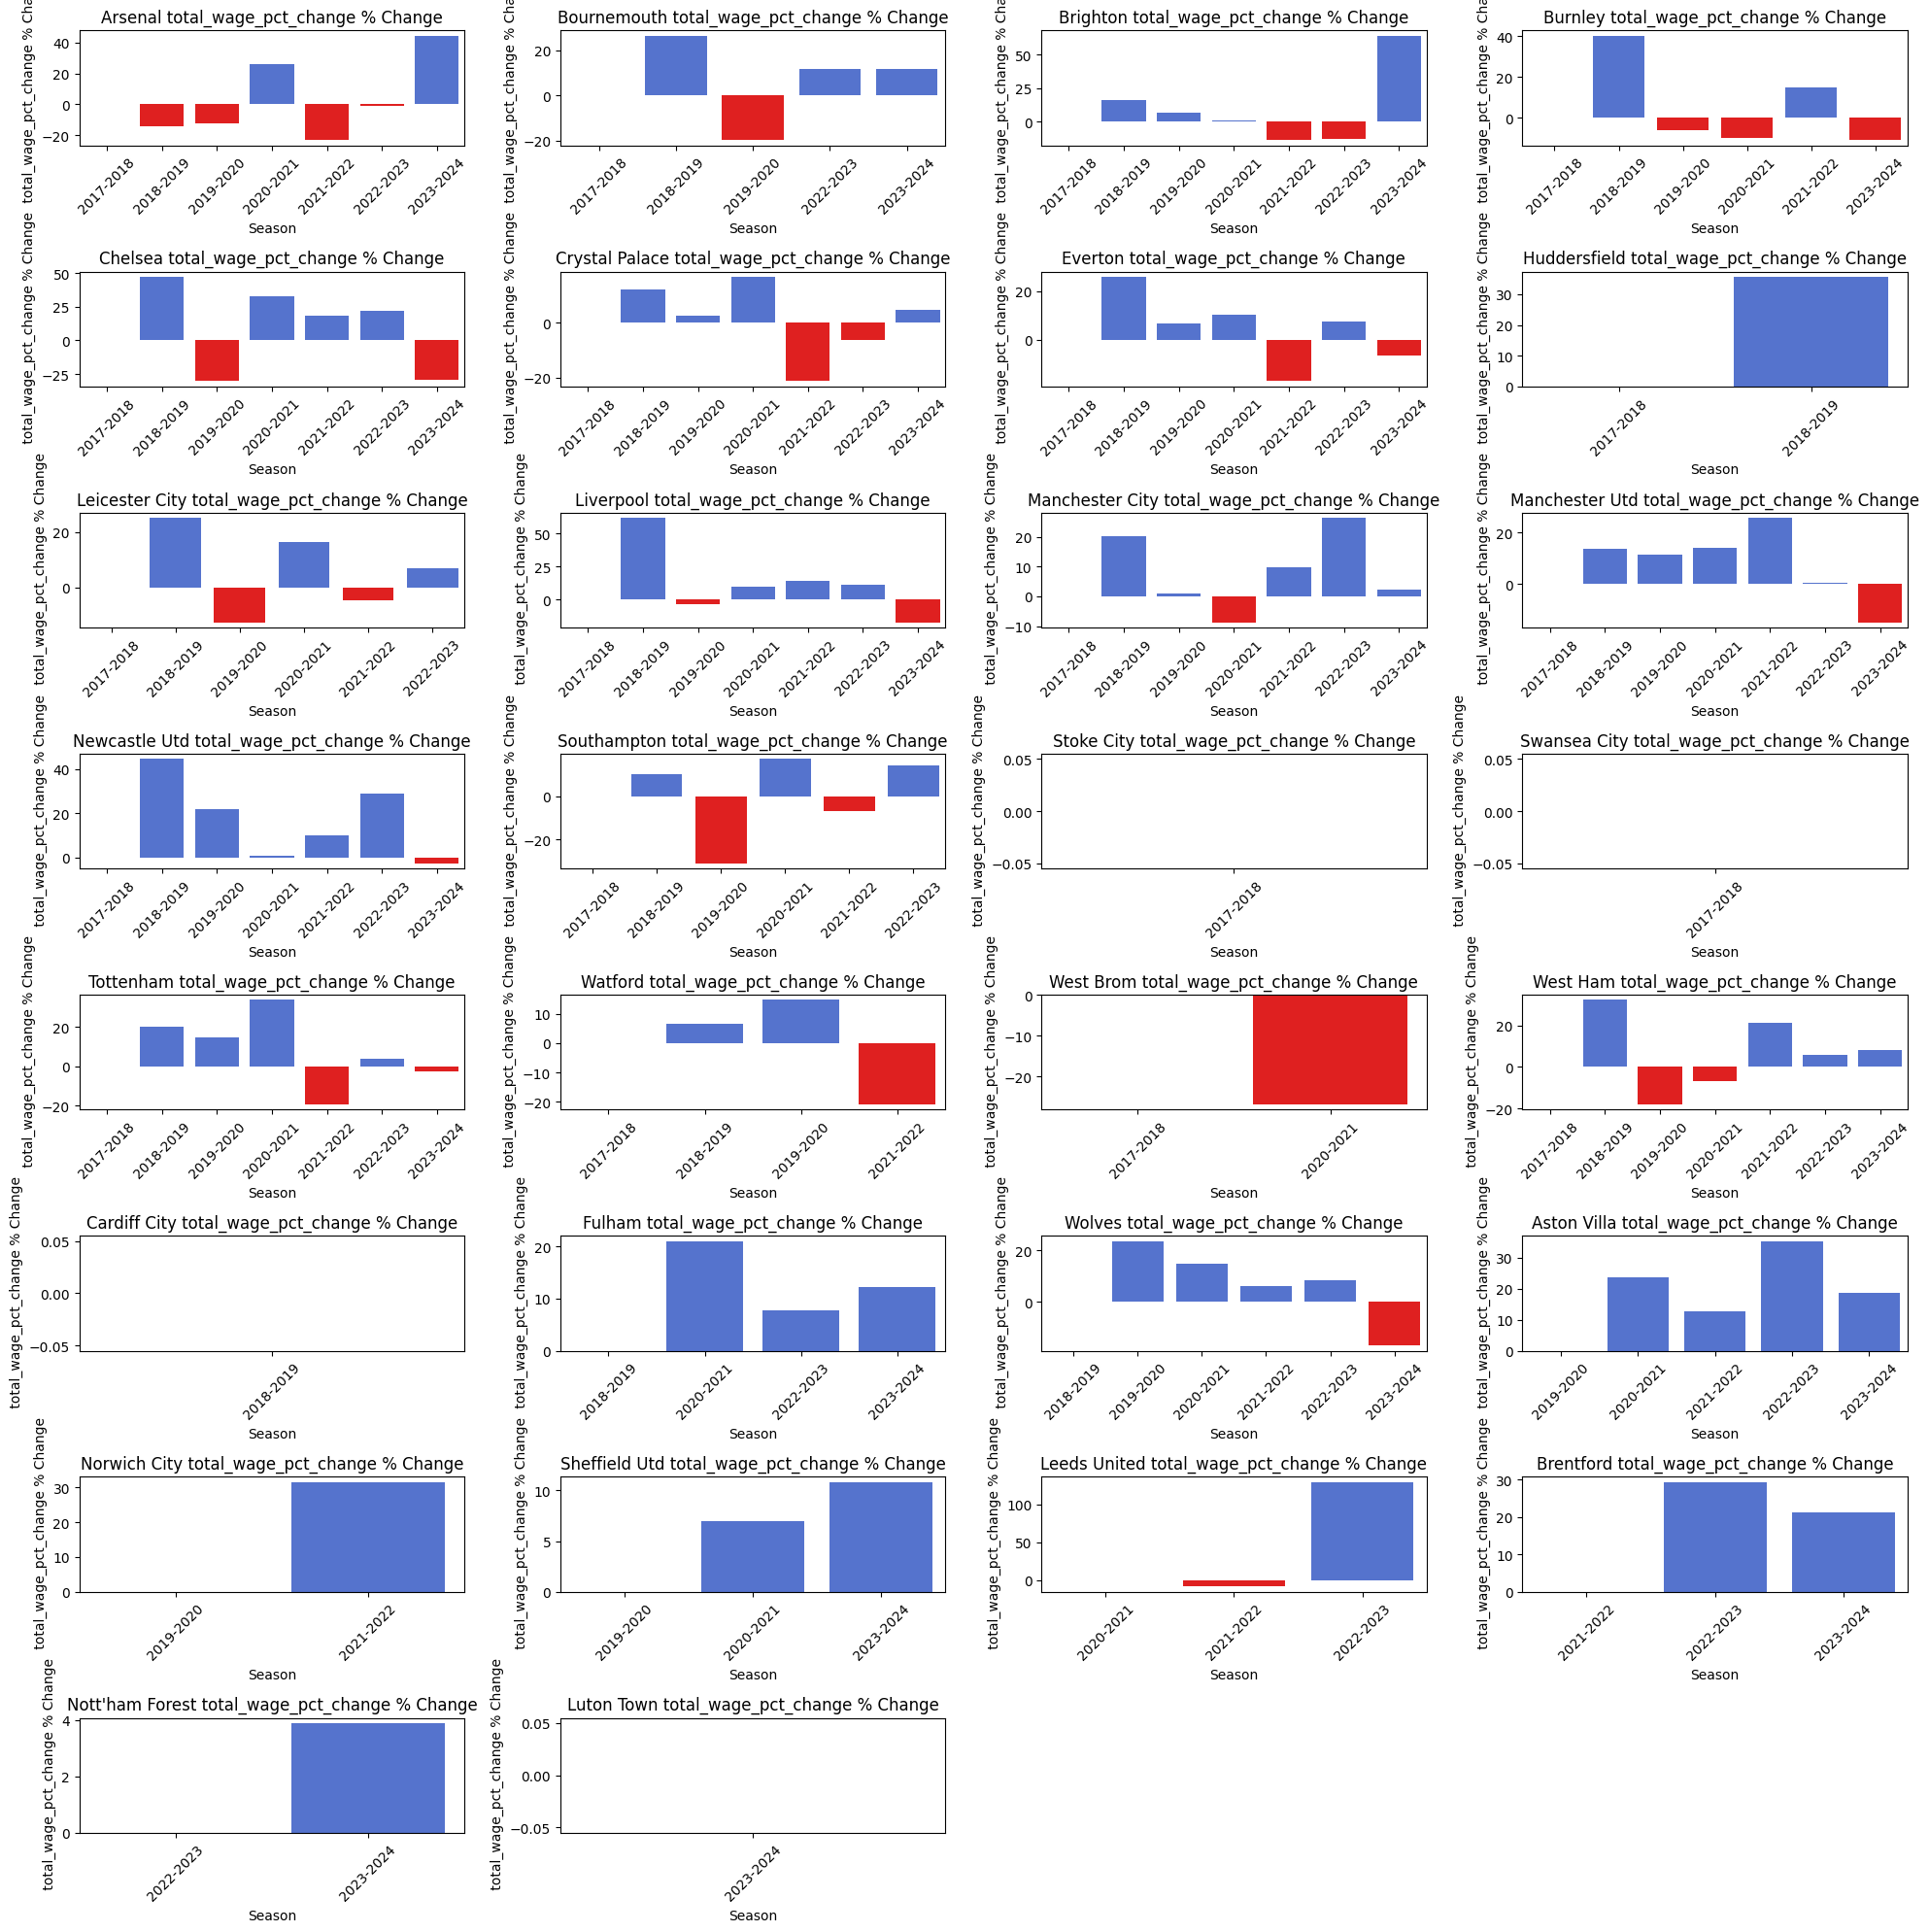

In [36]:
pct_change_plots(data, 'total_wage_pct_change')

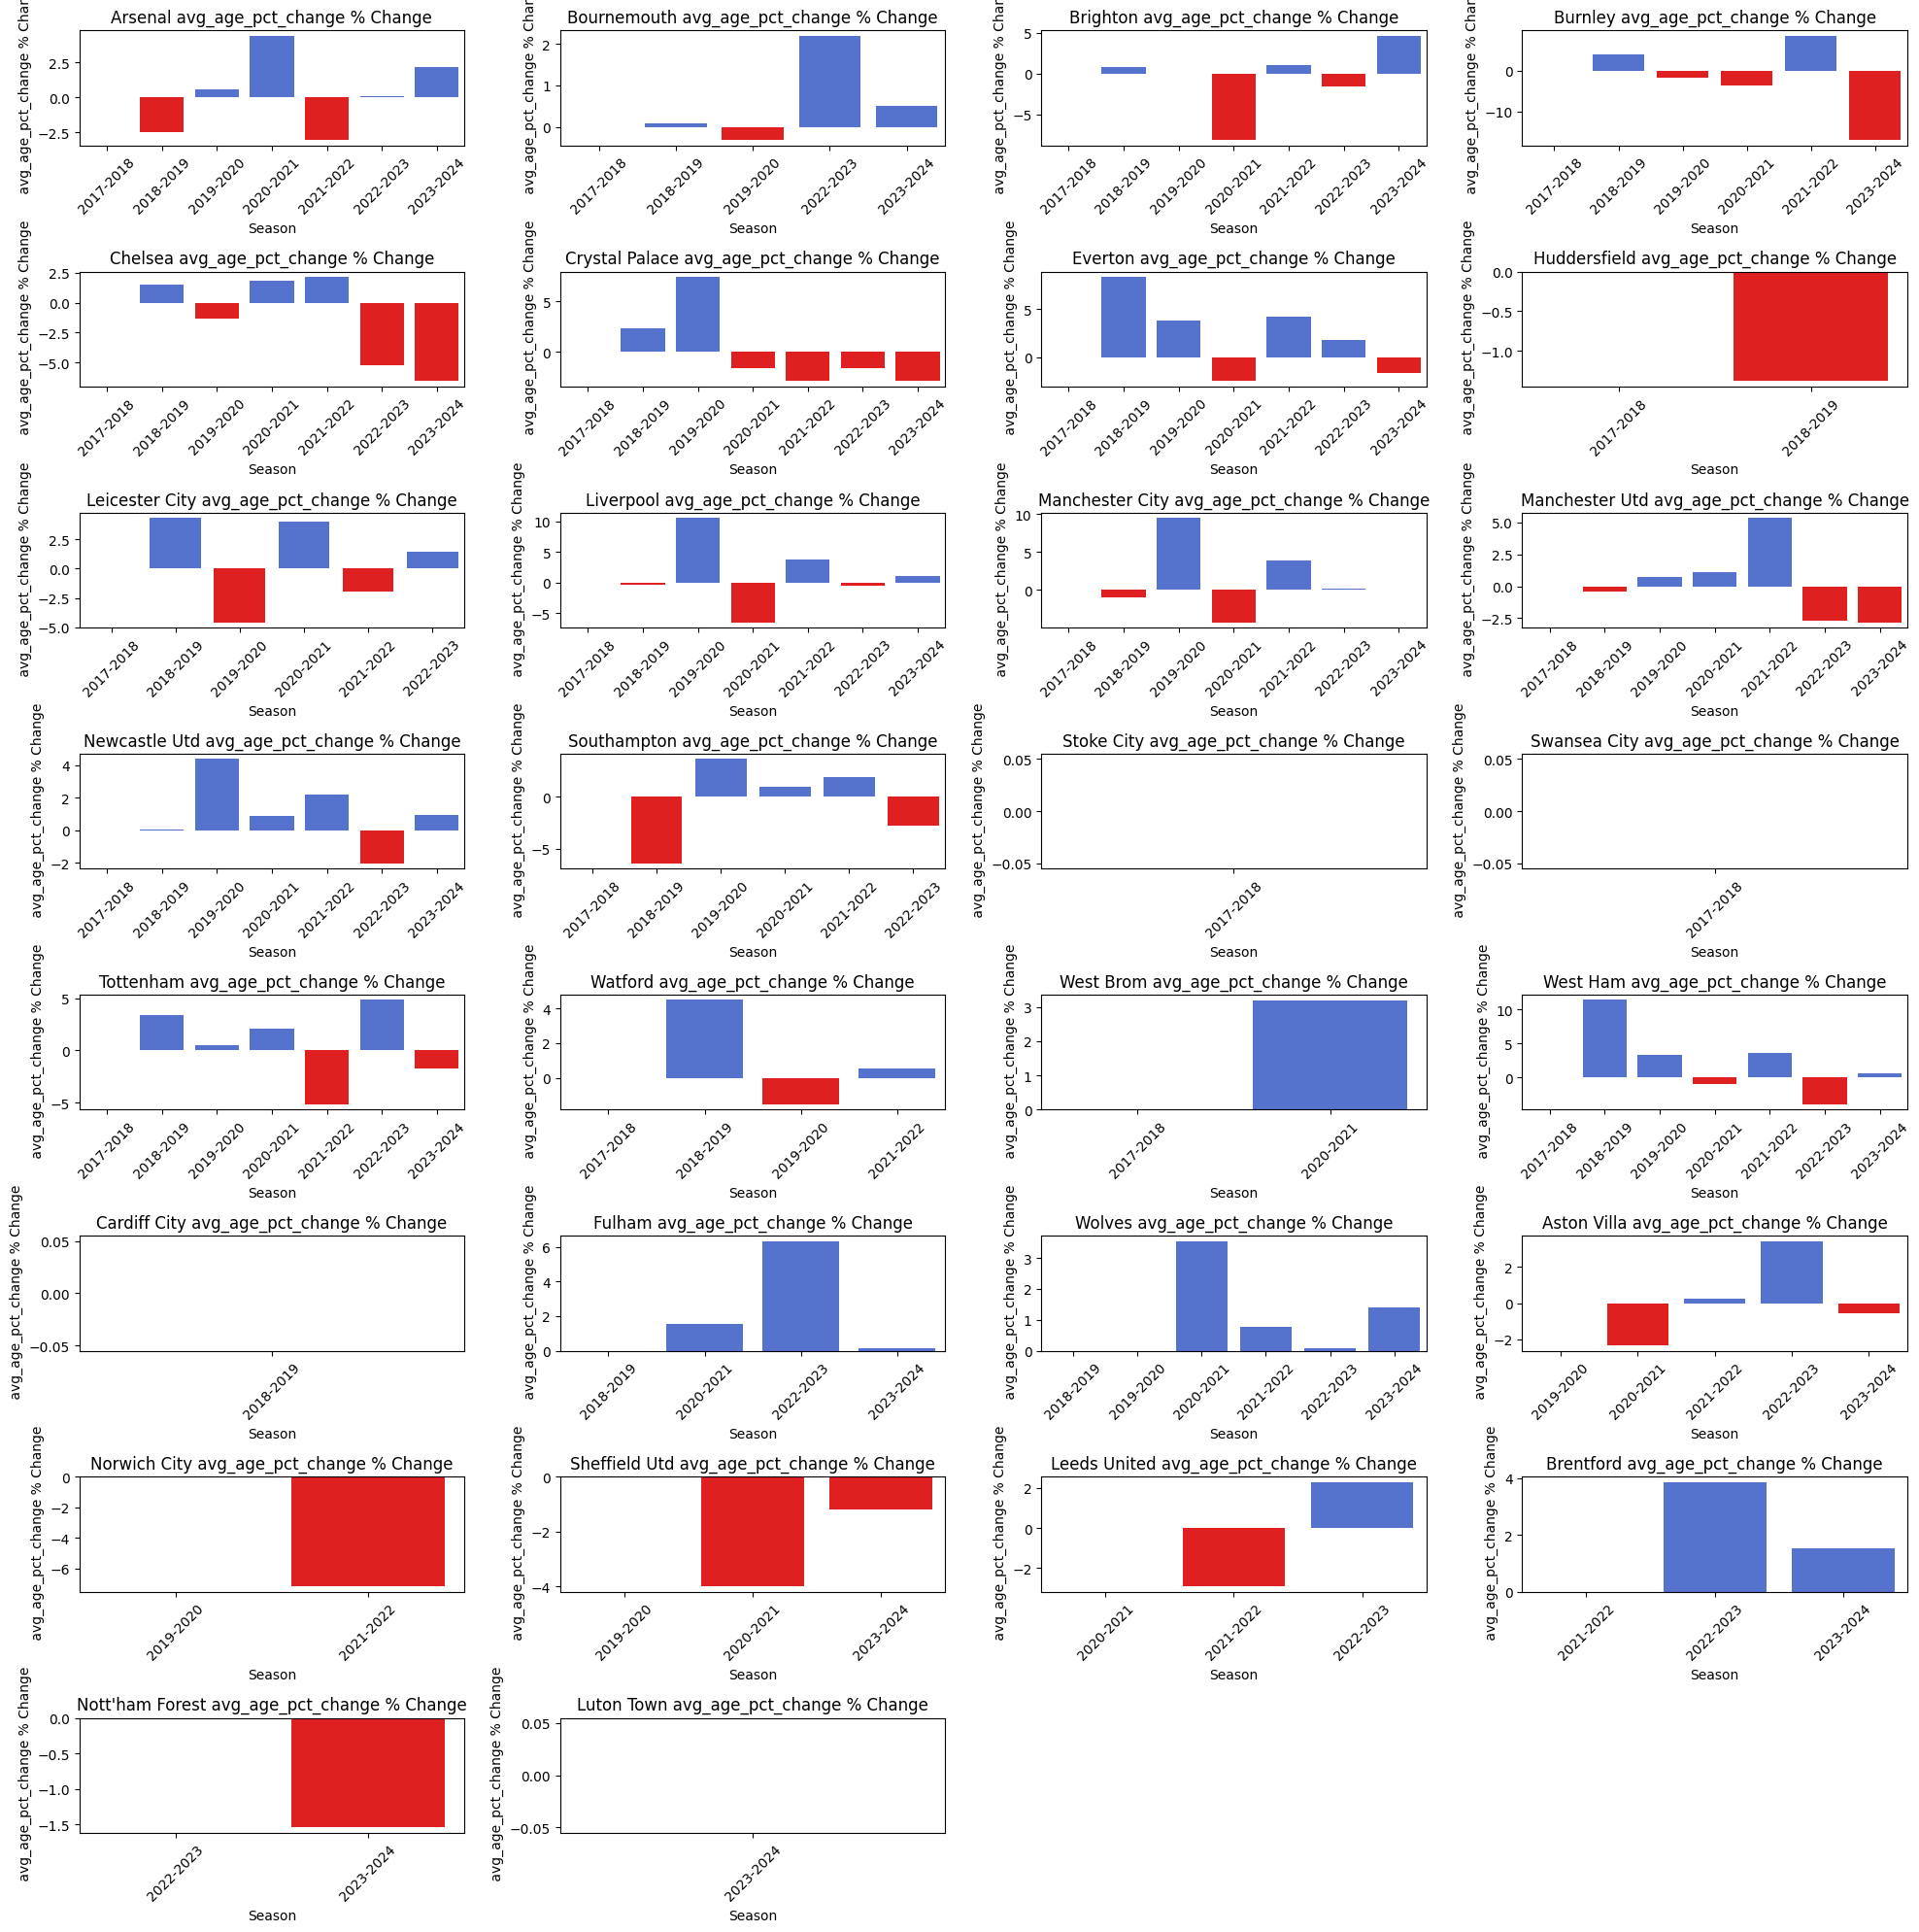

In [37]:
pct_change_plots(data, 'avg_age_pct_change')

In [38]:
pct_change_plots(data, 'total_players_pct_change')